In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = 'stanlee.json'
# tweets_data_path = 'stanlee.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
tweets= pd.DataFrame()
#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['country_code'] = list(map(lambda tweet: tweet['place']['country_code'] if tweet['place'] != None else None, tweets_data))

print(len(tweets_data))


13028


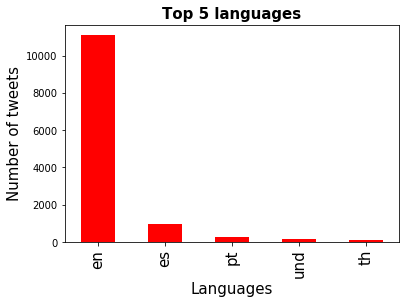

In [2]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [3]:
# get only english tweet for bag of word
df_text_lang = pd.DataFrame({'text': tweets['text'], 'lang': tweets['lang']  })
only_en_tweet = df_text_lang[df_text_lang['lang'].str.contains("en")]

In [4]:
#create bag of word
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer(stop_words='english').fit(only_en_tweet['text'])  # exclude common words
bag_of_words = vec.transform(only_en_tweet['text'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True) # sorted by the words_freq
# https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

[('rt', 9707),
 ('stan', 9339),
 ('lee', 8879),
 ('creator', 7725),
 ('dies', 7530),
 ('https', 6355),
 ('marvel', 4575),
 ('spongebob', 3910),
 ('weeks', 3727),
 ('later', 3724),
 ('e6entric', 3706),
 ('p2ex89l58g', 3706),
 ('stephen', 1296),
 ('new', 1153),
 ('super', 1098),
 ('kid', 1026),
 ('comic', 996),
 ('book', 971),
 ('create', 890),
 ('genius', 886),
 ('wanted', 885),
 ('jewish', 874),
 ('recently', 866),
 ('jewishvoice', 865),
 ('york', 864),
 ('deceased', 863),
 ('heroine', 862),
 ('stanlee', 778),
 ('hillenburg', 725),
 ('really', 703),
 ('mural', 659),
 ('south', 656),
 ('just', 642),
 ('popped', 635),
 ('49th', 635),
 ('andrews', 635),
 ('year', 512),
 ('st', 470),
 ('therealstanlee', 453),
 ('comics', 451),
 ('karl', 444),
 ('stefan', 437),
 ('hawking', 428),
 ('rest', 384),
 ('memorial', 382),
 ('beloved', 377),
 ('work', 376),
 ('peace', 373),
 ('lost', 370),
 ('excelsior', 368),
 ('shawnwarner629', 364),
 ('awesome', 363),
 ('los', 352),
 ('respect', 349),
 ('angeles

# Character analysis 

In [5]:
# this is the same with above
import json
import matplotlib.pyplot as plt
import re
import pandas as pd 
import numpy as np 
import seaborn as sns
import string
import nltk
import warnings 
%matplotlib inline

tweets_data_path = 'stanlee.json'
# tweets_data_path = 'stanlee.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
tweets= pd.DataFrame()

#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

# if it has list, it display the value as it is. If not, it has object. 
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['country_code'] = list(map(lambda tweet: tweet['place']['country_code'] if tweet['place'] != None else None, tweets_data))


In [6]:
# get only english tweet for bag of word
# df_text_lang = pd.DataFrame({'text': tweets['text'], 'lang': tweets['lang']  })
# only_en_tweet = df_text_lang[df_text_lang['text'].str.contains("en")]

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [11]:
tweets['fantastic four'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet))
tweets['daredevil'] = tweets['text'].apply(lambda tweet: word_in_text('daredevil', tweet))
tweets['scarlet witch'] = tweets['text'].apply(lambda tweet: word_in_text('scarlet witch', tweet))
tweets['inhumans'] = tweets['text'].apply(lambda tweet: word_in_text('inhumans', tweet))
tweets['nick fury'] = tweets['text'].apply(lambda tweet: word_in_text('nick fury', tweet))
tweets['black panther'] = tweets['text'].apply(lambda tweet: word_in_text('black panther', tweet))
tweets['hawkeye'] = tweets['text'].apply(lambda tweet: word_in_text('hawkeye', tweet))
tweets['doctor strange'] = tweets['text'].apply(lambda tweet: word_in_text('doctor strange', tweet))
tweets['ant-man'] = tweets['text'].apply(lambda tweet: word_in_text('ant-man', tweet))
tweets['black widow'] = tweets['text'].apply(lambda tweet: word_in_text('black widow', tweet))
tweets['hulk'] = tweets['text'].apply(lambda tweet: word_in_text('hulk', tweet))
tweets['thor'] = tweets['text'].apply(lambda tweet: word_in_text('thor', tweet))
tweets['iron man'] = tweets['text'].apply(lambda tweet: word_in_text('iron man', tweet))
tweets['x-men'] = tweets['text'].apply(lambda tweet: word_in_text('x-men', tweet))
tweets['spider-man'] = tweets['text'].apply(lambda tweet: word_in_text('spider-man', tweet))

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet) or word_in_text('daredevil', tweet) 
                                          or word_in_text('scarlet witch', tweet) or word_in_text('inhumans', tweet)  or word_in_text('nick fury', tweet) 
                                          or word_in_text('black panther', tweet)  or word_in_text('hawkeye', tweet)  or word_in_text('doctor strange', tweet) 
                                          or word_in_text('ant-man', tweet)  or word_in_text('black widow', tweet) 
                                          or word_in_text('hulk', tweet)  or word_in_text('thor', tweet)  or word_in_text('iron man', tweet) 
                                          or word_in_text('x-men', tweet)  or word_in_text('spider-man', tweet) )


In [12]:
tweets.head()

,text,lang,country,country_code,fantastic four,daredevil,scarlet witch,inhumans,nick fury,black panther,hawkeye,doctor strange,ant-man,black widow,hulk,thor,iron man,x-men,spider-man,relevant
0,RT @IndirectaVip: Aún sigo pensando en ti Stan...,es,None,None,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"RT @AvatarTorna: * No soy profeta, pero creo q...",es,None,None,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Enough said - Stan the man Lee https://t.co/zH...,en,None,None,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,"""RIP in Peace Stan Lee"" from @MiddleUrinalPod ...",en,None,None,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,RT @SoWizardPodcast: Check out episode 224 of ...,en,None,None,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


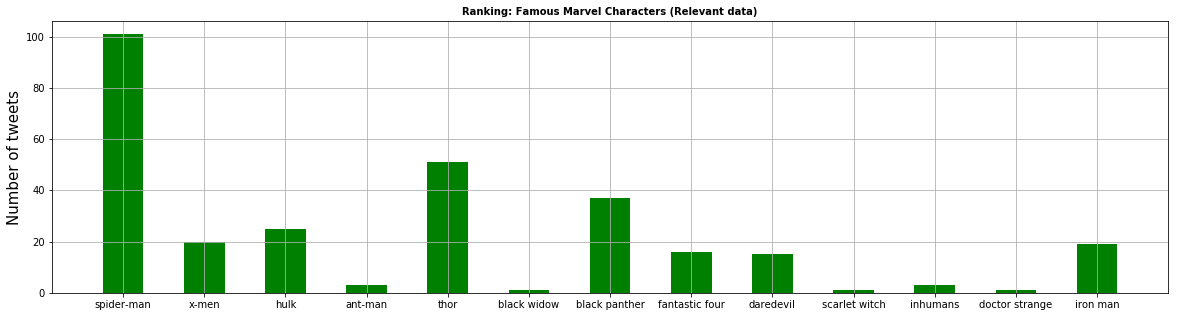

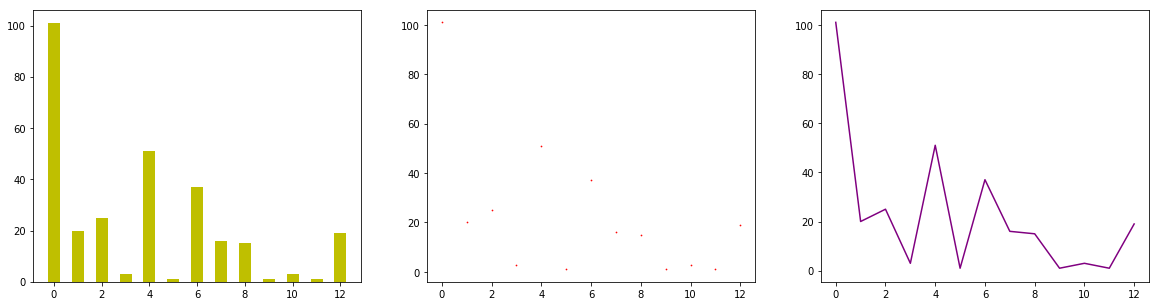

In [13]:
prg_langs = ['spider-man', 'x-men', 'hulk', 'ant-man','thor' ,'black widow','black panther','fantastic four', 
             'daredevil', 'scarlet witch','inhumans','doctor strange','iron man']

tweets_by_prg_heros = [tweets[tweets['relevant'] == True]['spider-man'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['x-men'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['hulk'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['ant-man'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['thor'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['black widow'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['black panther'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['fantastic four'].value_counts()[True]  ,
                      tweets[tweets['relevant'] == True]['daredevil'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['scarlet witch'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['inhumans'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['doctor strange'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['iron man'].value_counts()[True]
                      ]
x_pos = list(range(len(prg_langs)))
width = 0.5 # this is bar width
#figsize=(10, 5) set the width the each column
fig, ax = plt.subplots( figsize=(20, 5))
plt.bar(x_pos, tweets_by_prg_heros, width ,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Famous Marvel Characters (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p - 0.3 + 0.6 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.wspace = 100
# plt.figure(2, dpi=500, figsize=(50,50))
plt.grid()


fig, ax1 = plt.subplots(1, 3, figsize=(20, 5))
ax1[0].bar(x_pos, tweets_by_prg_heros, width ,alpha=1,color='y')
ax1[1].scatter(x_pos, tweets_by_prg_heros, width ,alpha=1,color='r')
ax1[2].plot(x_pos, tweets_by_prg_heros, width ,alpha=1,color='purple')


In [14]:
tweets_by_prg_heros

[101, 20, 25, 3, 51, 1, 37, 16, 15, 1, 3, 1, 19]

In [15]:
# get the only relevant data from the tweets
df_tweet_characters_only = tweets.loc[tweets['relevant'] == True].copy()

# removed not required columns
df_tweet_characters_only = df_tweet_characters_only.drop(['text', 'relevant',  'ant-man','black widow','fantastic four', 'daredevil','scarlet witch','inhumans','nick fury','hawkeye','doctor strange','iron man'], axis=1)

# # Fill all none value with the most value 
df_tweet_characters_only['lang'] = df_tweet_characters_only['lang'].fillna(df_tweet_characters_only['lang'].mode()[0]) #with mean value
df_tweet_characters_only.country = df_tweet_characters_only.country.fillna(df_tweet_characters_only['country'].mode()[0]) #with mean value
df_tweet_characters_only.country_code = df_tweet_characters_only.country_code.fillna(df_tweet_characters_only.country_code.mode()[0]) #with mean value
# df_tweet_characters_only.head()
df_characters_by_language = pd.DataFrame(df_tweet_characters_only.groupby(['lang']).sum())

In [16]:
df_characters_by_language

,black panther,hulk,thor,x-men,spider-man
lang,,,,,
en,34.0,16.0,47.0,15.0,89.0
es,0.0,5.0,1.0,2.0,6.0
fr,2.0,0.0,0.0,0.0,1.0
it,0.0,1.0,1.0,0.0,0.0
ja,0.0,0.0,0.0,0.0,2.0
pt,0.0,0.0,2.0,1.0,2.0
th,0.0,0.0,0.0,1.0,0.0
tl,1.0,0.0,0.0,0.0,0.0
tr,0.0,1.0,0.0,1.0,1.0


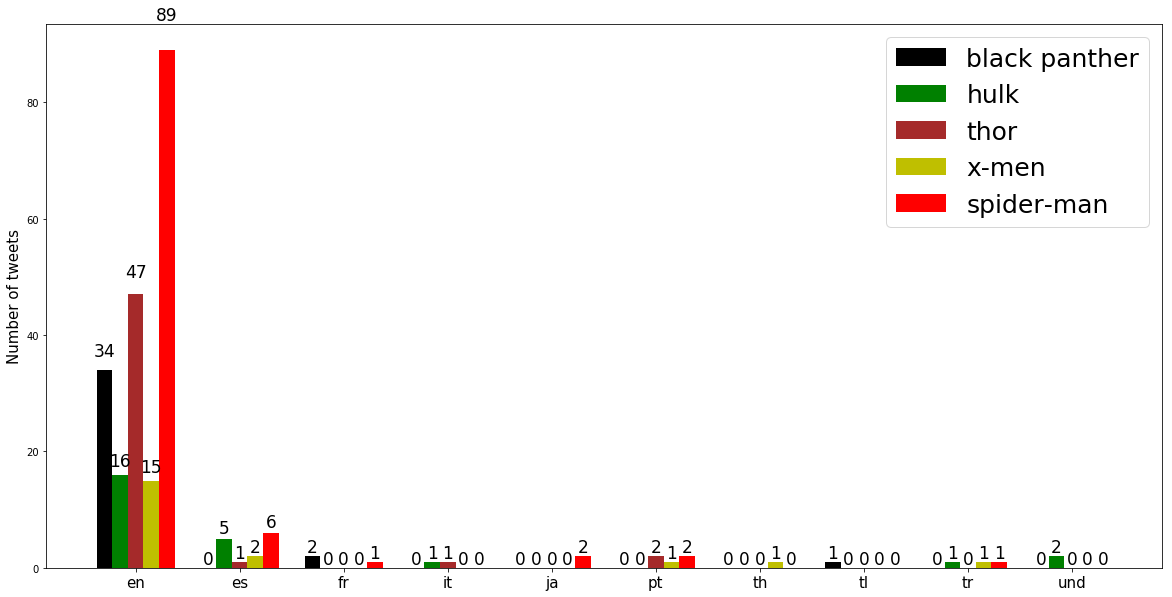

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 10 # this is number of value for each column
ind = np.arange(0, N * 2, 2) # increase the space between the bars
width = 0.3     # the width of the bars

fig, ax = plt.subplots( figsize=(20, 10))

kvals = list(df_characters_by_language['black panther'])
rects1 = ax.bar(ind, kvals, width, color='black')
yvals = list(df_characters_by_language['hulk'])
rects2 = ax.bar(ind+width, yvals, width, color='green')
zvals = list(df_characters_by_language['thor'])
rects3 = ax.bar(ind+width*2, zvals, width, color='brown')
Lvals = list(df_characters_by_language['x-men'])
rects4 = ax.bar(ind+width*3, Lvals, width, color='y')
mvals = list(df_characters_by_language['spider-man'])
rects5 = ax.bar(ind+width*4, mvals, width, color='red')

ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_xticks(ind+width*2) # this is x label location
ax.set_xticklabels( ('en', 'es', 'fr', 'it', 'ja', 'pt', 'th','tl', 'tr', 'und') , fontsize=15, ha='center')
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0], rects5[0]), ('black panther', 'hulk', 'thor', 'x-men', 'spider-man' ) 
         ,fontsize = '25',loc=1)  # loc =1,2,3,4 - each corner

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize = '17')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

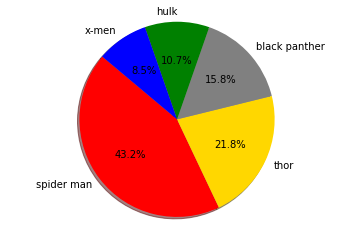

In [18]:
#This is from Stan lee topic tweets - 258 out of 13028 tweets mentioned top 15 marvel characters

labels = 'spider man', 'thor', 'black panther', 'hulk', 'x-men'
sizes = [101, 51, 37, 25, 20]
colors = ['red', 'gold', 'grey', 'green', 'blue']  
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# 258 out of 13028 tweets have the marvel characters and 293 character occurrences in the 258 tweets. 


# Compare the characters from comic / marvel characters

In [19]:
data = {'text': [] }

tweets_data_path = 'comic_characters.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")

#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        data['text'].append(tweet['text'])
        tweets_data.append(tweet)
    except:
        continue

# tweets = pd.DataFrame()
# this add the data dictionary to dataFrame. Can't use df = pd.DataFrame(data) becuase arrays must all be same length error 
tweets= pd.DataFrame({ key:pd.Series(value) for key, value in data.items() }) #add the data to panda frame





In [20]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet) or word_in_text('daredevil', tweet) 
                                          or word_in_text('scarlet witch', tweet) or word_in_text('inhumans', tweet)  or word_in_text('nick fury', tweet) 
                                          or word_in_text('black panther', tweet)  or word_in_text('hawkeye', tweet)  or word_in_text('doctor strange', tweet) 
                                          or word_in_text('ant-man', tweet)  or word_in_text('black widow', tweet) 
                                          or word_in_text('hulk', tweet)  or word_in_text('thor', tweet)  or word_in_text('iron man', tweet) 
                                          or word_in_text('x-men', tweet)  or word_in_text('spider-man', tweet) )

tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

#Characters_relevant_tweet has only the tweets contains marvel characters
Characters_relevant_tweet =  tweets.loc[tweets['relevant'] == True] 

In [21]:
Characters_relevant_tweet.head()


,text,relevant,lang
23,RT @ComicBookNOW: MARVEL Fans Campaigning NETF...,True,en
24,PlayStation 4 PS4 Slim 1TB Marvel's Spider-Man...,True,en
43,Amazing Spider-Man #36 v2 CGC 9.6 9/11 World T...,True,en
59,RT @ComicBookNOW: MARVEL Fans Campaigning NETF...,True,en
78,@lokithorodinson @amazonheroicon And Cap Marve...,True,en


In [23]:
tweets['fantastic four'] = tweets['text'].apply(lambda tweet: word_in_text('fantastic four', tweet))
tweets['daredevil'] = tweets['text'].apply(lambda tweet: word_in_text('daredevil', tweet))
tweets['scarlet witch'] = tweets['text'].apply(lambda tweet: word_in_text('scarlet witch', tweet))
tweets['inhumans'] = tweets['text'].apply(lambda tweet: word_in_text('inhumans', tweet))
tweets['nick fury'] = tweets['text'].apply(lambda tweet: word_in_text('nick fury', tweet))
tweets['black panther'] = tweets['text'].apply(lambda tweet: word_in_text('black panther', tweet))
tweets['hawkeye'] = tweets['text'].apply(lambda tweet: word_in_text('hawkeye', tweet))
tweets['doctor strange'] = tweets['text'].apply(lambda tweet: word_in_text('doctor strange', tweet))
tweets['ant-man'] = tweets['text'].apply(lambda tweet: word_in_text('ant-man', tweet))
tweets['black widow'] = tweets['text'].apply(lambda tweet: word_in_text('black widow', tweet))
tweets['hulk'] = tweets['text'].apply(lambda tweet: word_in_text('hulk', tweet))
tweets['thor'] = tweets['text'].apply(lambda tweet: word_in_text('thor', tweet))
tweets['iron man'] = tweets['text'].apply(lambda tweet: word_in_text('iron man', tweet))
tweets['x-men'] = tweets['text'].apply(lambda tweet: word_in_text('x-men', tweet))
tweets['spider-man'] = tweets['text'].apply(lambda tweet: word_in_text('spider-man', tweet))

In [24]:
prg_langs = ['spider-man', 'x-men', 'hulk', 'ant-man','thor' ,'black widow','black panther','fantastic four', 'daredevil','scarlet witch',
            'inhumans','nick fury','hawkeye','doctor strange','iron man']

tweets_by_prg_heros = [tweets['spider-man'].value_counts()[True], 
                      tweets['x-men'].value_counts()[True], 
                      tweets['hulk'].value_counts()[True],
                      tweets['ant-man'].value_counts()[True],
                      tweets['thor'].value_counts()[True],
                      tweets['black widow'].value_counts()[True],
                      tweets['black panther'].value_counts()[True],
                      tweets['fantastic four'].value_counts()[True]  ,
                      tweets['daredevil'].value_counts()[True],
                      tweets['scarlet witch'].value_counts()[True],
                      tweets['inhumans'].value_counts()[True],
                      tweets['nick fury'].value_counts()[True],
                      tweets['hawkeye'].value_counts()[True],
                      tweets['doctor strange'].value_counts()[True],
                      tweets['iron man'].value_counts()[True]
                      ]

In [25]:
tweets_by_prg_heros

[595, 96, 113, 14, 232, 17, 115, 14, 141, 23, 2, 7, 6, 4, 57]

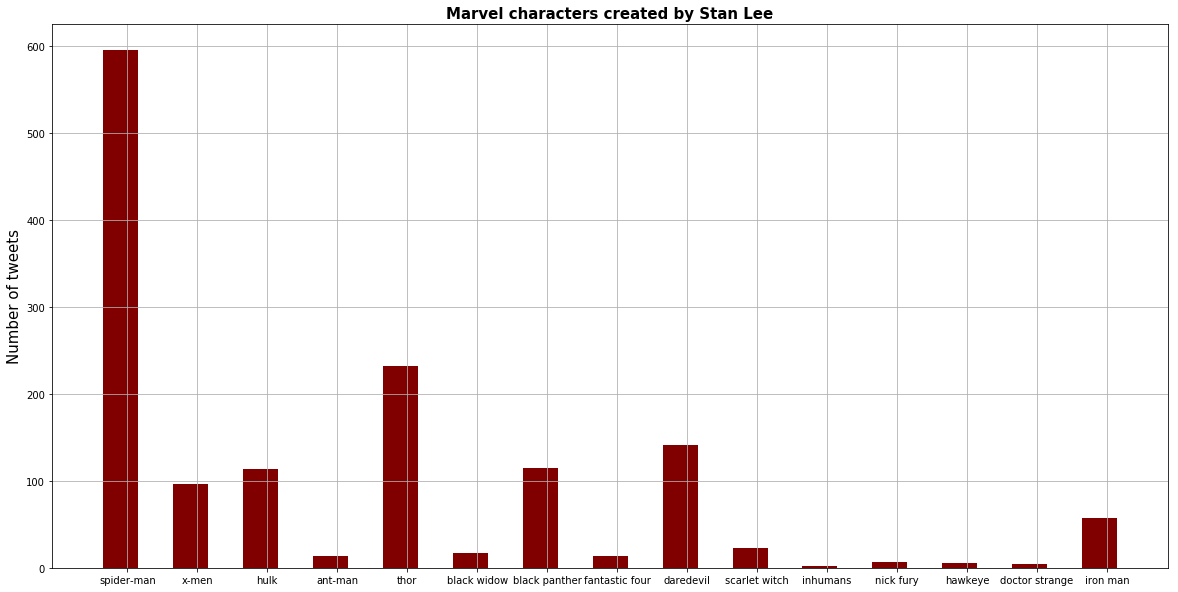

In [26]:
x_pos = list(range(len(prg_langs)))
width = 0.5
# fig, ax = plt.subplots()
fig, ax = plt.subplots( figsize=(20, 10))
plt.bar(x_pos, tweets_by_prg_heros, width, alpha=1, color='maroon')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Marvel characters created by Stan Lee', fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.2 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [27]:
# drop unneccessary field
characters_lang = tweets.drop(['text'], axis=1)

# Fill all none value with the most value 
characters_lang['lang'] = characters_lang['lang'].fillna(characters_lang['lang'].mode()[0]) #with common value

#convert the true/false value to int
characters_lang = characters_lang.applymap(lambda x: 1 if x == True else x)
characters_lang = characters_lang.applymap(lambda x: 0 if x == False else x)

# get sum for each characters by the language
characters_lang = pd.DataFrame(characters_lang.groupby(['lang']).sum())

# delete any rows have value=0 and least value columns
characters_lang = characters_lang.loc[(characters_lang!=0).any(axis=1)]
characterTop7Langauge = characters_lang.drop(['ar', 'da','de','et','eu','fr','it','lt','nl', 'ro', 'ru', 'sv','tr', 'und'])

#Get the top 7 characters
sums = characterTop7Langauge.select_dtypes(pd.np.number).sum().rename('total')

In [28]:
characters_lang.head()

,relevant,fantastic four,daredevil,scarlet witch,inhumans,nick fury,black panther,hawkeye,doctor strange,ant-man,black widow,hulk,thor,iron man,x-men,spider-man
lang,,,,,,,,,,,,,,,,
ar,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
da,4,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0
de,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
en,1178,13,121,21,2,7,107,6,3,13,17,97,144,44,72,541
es,41,1,6,0,0,0,3,0,1,0,0,0,6,3,5,19


In [29]:
characterTop7Langauge

,relevant,fantastic four,daredevil,scarlet witch,inhumans,nick fury,black panther,hawkeye,doctor strange,ant-man,black widow,hulk,thor,iron man,x-men,spider-man
lang,,,,,,,,,,,,,,,,
en,1178,13,121,21,2,7,107,6,3,13,17,97,144,44,72,541
es,41,1,6,0,0,0,3,0,1,0,0,0,6,3,5,19
in,3,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0
ja,96,0,0,0,0,0,1,0,0,1,0,1,66,1,3,23
pt,29,0,5,0,0,0,0,0,0,0,0,10,11,0,4,3
th,10,0,2,0,0,0,0,0,0,0,0,0,0,0,8,0
tl,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


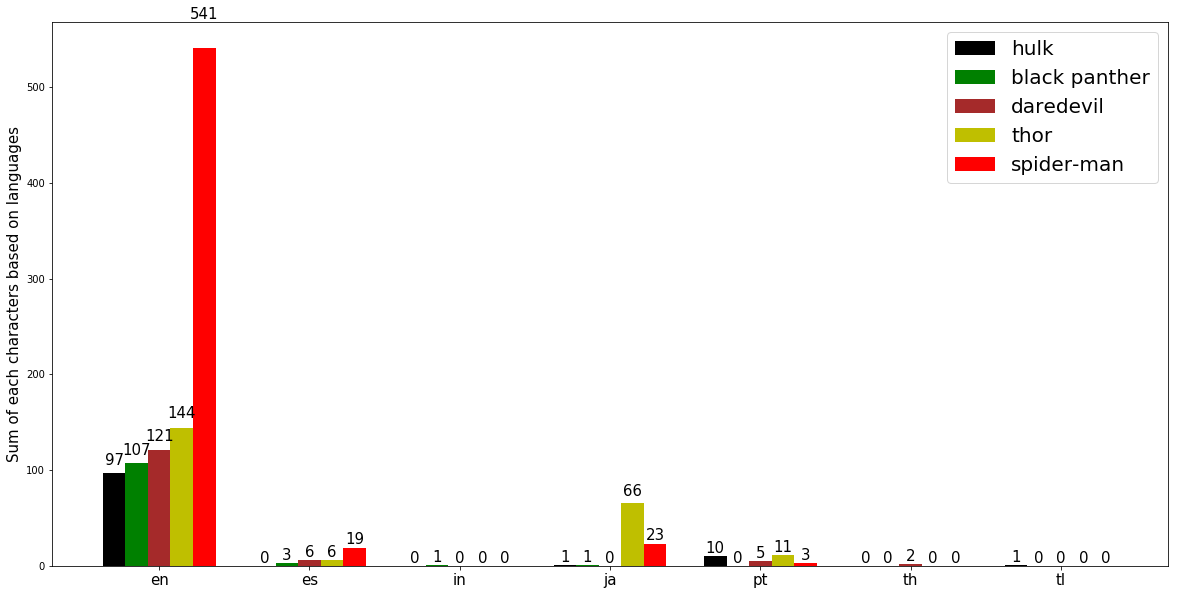

In [30]:
N = 7
ind = np.arange(0, N * 2, 2) # increase the space between the bars
width = 0.3     # the width of the bars

fig, ax = plt.subplots( figsize=(20, 10))

kvals = list(characterTop7Langauge['hulk'])
rects1 = ax.bar(ind, kvals, width, color='black')
yvals = list(characterTop7Langauge['black panther'])
rects2 = ax.bar(ind+width, yvals, width, color='green')
zvals = list(characterTop7Langauge['daredevil'])
rects3 = ax.bar(ind+width*2, zvals, width, color='brown')
Lvals = list(characterTop7Langauge['thor'])
rects4 = ax.bar(ind+width*3, Lvals, width, color='y')
mvals = list(characterTop7Langauge['spider-man'])
rects5 = ax.bar(ind+width*4, mvals, width, color='red')

ax.set_ylabel('Sum of each characters based on languages', fontsize=15)
ax.set_xticks(ind+width*2) # this is x label location
ax.set_xticklabels( ('en', 'es', 'in', 'ja', 'pt', 'th','tl') , fontsize=15, ha='center')
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0], rects5[0]), ( 'hulk', 'black panther','daredevil','thor', 'spider-man' ) 
         ,fontsize = '20',loc=1)  # loc =1,2,3,4 - each corner

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom', fontsize = '15')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

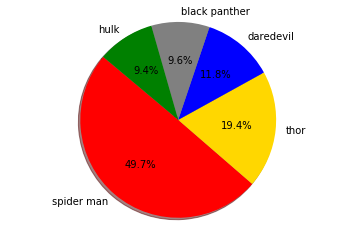

In [31]:
#This is from Stan lee topic tweets - 258 out of 13028 tweets mentioned top 15 marvel characters

labels = 'spider man', 'thor', 'daredevil', 'black panther', 'hulk'
sizes = [595, 232, 141, 115, 113 ]
colors = ['red', 'gold', 'blue', 'grey', 'green']  
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# 258 out of 13028 tweets have the marvel characters and 293 character occurrences in the 258 tweets. 


In [32]:

#Select only english for bag of words
Characters_relevant_tweet_EN = Characters_relevant_tweet[Characters_relevant_tweet['lang'].str.contains("en")]
#reset the index with sequennce number
Characters_relevant_tweet_EN = Characters_relevant_tweet_EN.drop('relevant', axis=1)

Characters_relevant_tweet_EN[:5]

,text,lang
23,RT @ComicBookNOW: MARVEL Fans Campaigning NETF...,en
24,PlayStation 4 PS4 Slim 1TB Marvel's Spider-Man...,en
43,Amazing Spider-Man #36 v2 CGC 9.6 9/11 World T...,en
59,RT @ComicBookNOW: MARVEL Fans Campaigning NETF...,en
78,@lokithorodinson @amazonheroicon And Cap Marve...,en


In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# remove RT, username, numbers, functuations and stop words
Characters_relevant_tweet_EN['text'] = Characters_relevant_tweet_EN.apply(lambda row: remove_pattern(row['text'],"http\S+"), axis=1)
cleaned_character_list = []
for index, row in Characters_relevant_tweet_EN.iterrows():
    row['text'] = re.sub('^RT @\S+'," ",row['text']).lower()
    row['text'] = re.sub('[^\w\s]|[0-9_]'," ",row['text'])
    #tokenize the text to remov stop words
    tokenized=nltk.word_tokenize(row['text'])
    #remove stop words
    cleaned_character_list.append(" ".join(list(x for x in tokenized if x not in stop)))

In [34]:
cleaned_character_list[:10]

['marvel fans campaigning netflix renew daredevil season',
 'playstation ps slim tb marvel spider man bundle',
 'amazing spider man v cgc world trade center marvel cgc comics comicbooks',
 'marvel fans campaigning netflix renew daredevil season',
 'lokithorodinson amazonheroicon cap marvel also completely covered ready hear cap marvel amp mer',
 'niggas saying would rather watch spider man instead black panther look cool man ya fucki',
 'preview idw marvel action spider man',
 'marvel legends black panther movie wave hi res package amp loose images',
 'storm og x men wife cosplay cosplay made cosplay xmen storm marvel',
 'marvel legends black panther movie wave hi res package amp loose images']

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import ngrams

from sklearn.feature_extraction.text import CountVectorizer 
def n_gram_list(sentence, n):
    return_value = []
    if(n==1):
        return sentence.split()            
    else:
        sentence = sentence.replace(",", "") # need to delete comma before passing to ngrams
        splited_sentence = ngrams(sentence.split(), n)
    for grams in splited_sentence:
        return_value.append(' '.join(grams))
    return return_value

In [36]:
onegram_list=[]
bigram_list = []
fourgram_list =[]
for row in cleaned_character_list:
    onegram = n_gram_list(row, 1)
    onegram_list.extend(onegram)
    bigram = n_gram_list(row, 2)
    bigram_list.extend(bigram)  
    fourgram = n_gram_list(row, 4)
    fourgram_list.extend(fourgram) # need to be one giant list

# put the result to the dictionary

onegram_result_dic = dict((x,onegram_list.count(x)) for x in set(onegram_list))
bigram_result_dic = dict((x,bigram_list.count(x)) for x in set(bigram_list))
fourgram_result = dict((x,fourgram_list.count(x)) for x in set(fourgram_list))
#sort the result

onegram_result = sorted(onegram_result_dic.items(), key=lambda x: x[1], reverse=True)  
bigram_result = sorted(bigram_result_dic.items(), key=lambda x: x[1], reverse=True)  
fourgram_result  = sorted(fourgram_result.items(), key=lambda x: x[1], reverse=True)  

C:\Users\jslnk\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: generator 'ngrams' raised StopIteration
  del sys.path[0]


In [37]:
onegram_result[:10]

[('marvel', 911),
 ('man', 619),
 ('spider', 562),
 ('black', 307),
 ('avengers', 269),
 ('men', 250),
 ('captain', 242),
 ('movies', 179),
 ('wonder', 174),
 ('woman', 173)]

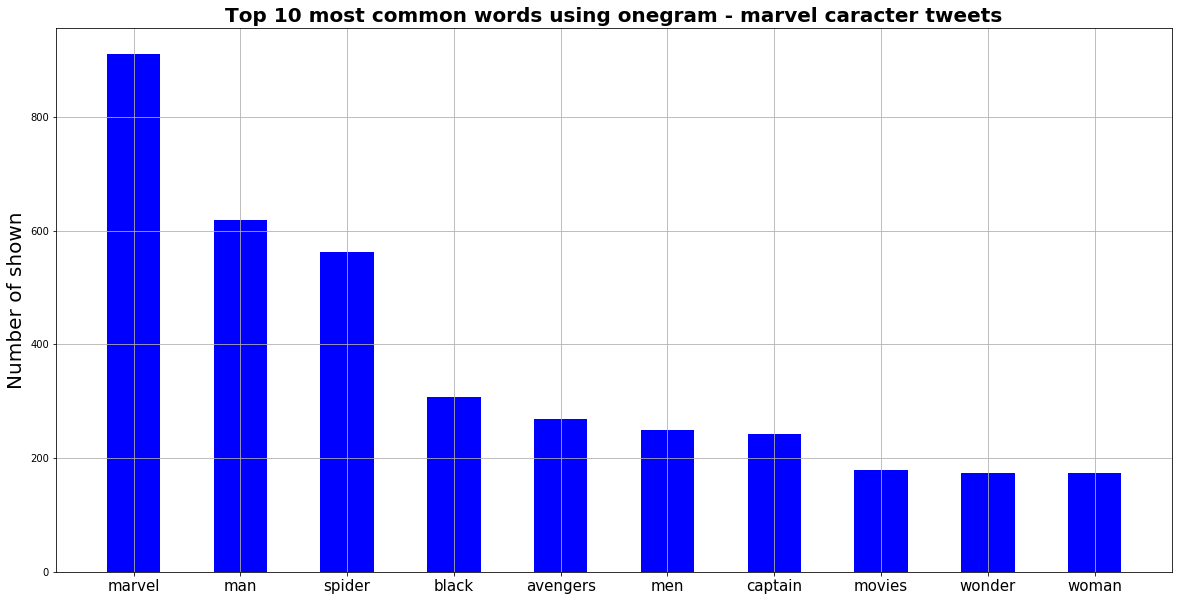

In [38]:
x_values =[]
y_values=[]
# plt.plot(onegram[0], onegram[1])
# plt.show()
for key_value in onegram_result[:10]:
    x_values.append(key_value[0])
    y_values.append(key_value[1])
# x_values = list(range(len(prg_langs)))
width = 0.5
# fig, ax = plt.subplots()
fig, ax = plt.subplots( figsize=(20, 10))
plt.bar(x_values, y_values, width, alpha=1, color='Blue')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets shown', fontsize=20)
ax.set_title('Top 10 most common words using onegram - marvel character tweets', fontsize=20, fontweight='bold')
# ax.set_xticks([p + 0.2 * width for p in x_values])
ax.set_xticklabels(x_values, fontsize=15)
plt.grid()


In [39]:
bigram_result[:10]

[('spider man', 547),
 ('captain marvel', 233),
 ('wonder woman', 173),
 ('man wonder', 172),
 ('avengers spider', 172),
 ('terminator men', 171),
 ('marvel kingsman', 171),
 ('woman captain', 171),
 ('movies avengers', 171),
 ('kingsman terminator', 171)]

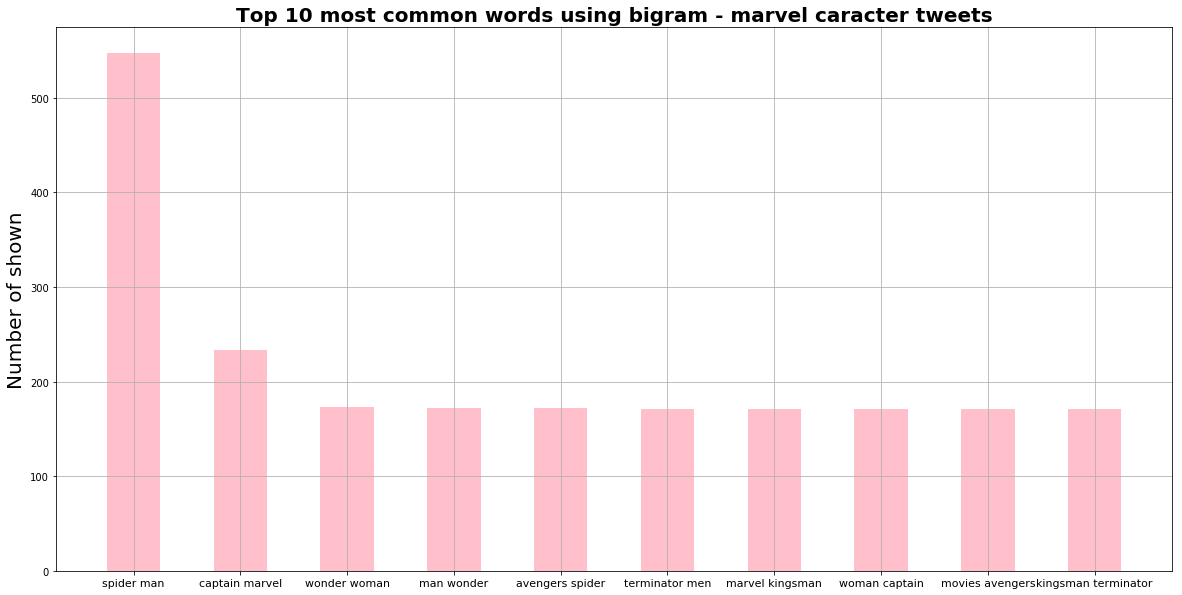

In [40]:
x_values =[]
y_values=[]
# plt.plot(onegram[0], onegram[1])
# plt.show()
for key_value in bigram_result[:10]:
    x_values.append(key_value[0])
    y_values.append(key_value[1])
# x_values = list(range(len(prg_langs)))
width = 0.5
# fig, ax = plt.subplots()
fig, ax = plt.subplots( figsize=(20, 10))
plt.bar(x_values, y_values, width, alpha=1, color='Pink')

# Setting axis labels and ticks
ax.set_ylabel('Number of shown', fontsize=20)
ax.set_title('Top 10 most common words using bigram - marvel caracter tweets', fontsize=20, fontweight='bold')
# ax.set_xticks([p + 0.2 * width for p in x_values])
ax.set_xticklabels(x_values, fontsize=11)
plt.grid()


In [41]:
fourgram_result[:7]

[('spider man wonder woman', 172),
 ('avengers spider man wonder', 171),
 ('marvel kingsman terminator men', 171),
 ('man wonder woman captain', 171),
 ('wonder woman captain marvel', 171),
 ('woman captain marvel kingsman', 171),
 ('captain marvel kingsman terminator', 171)]

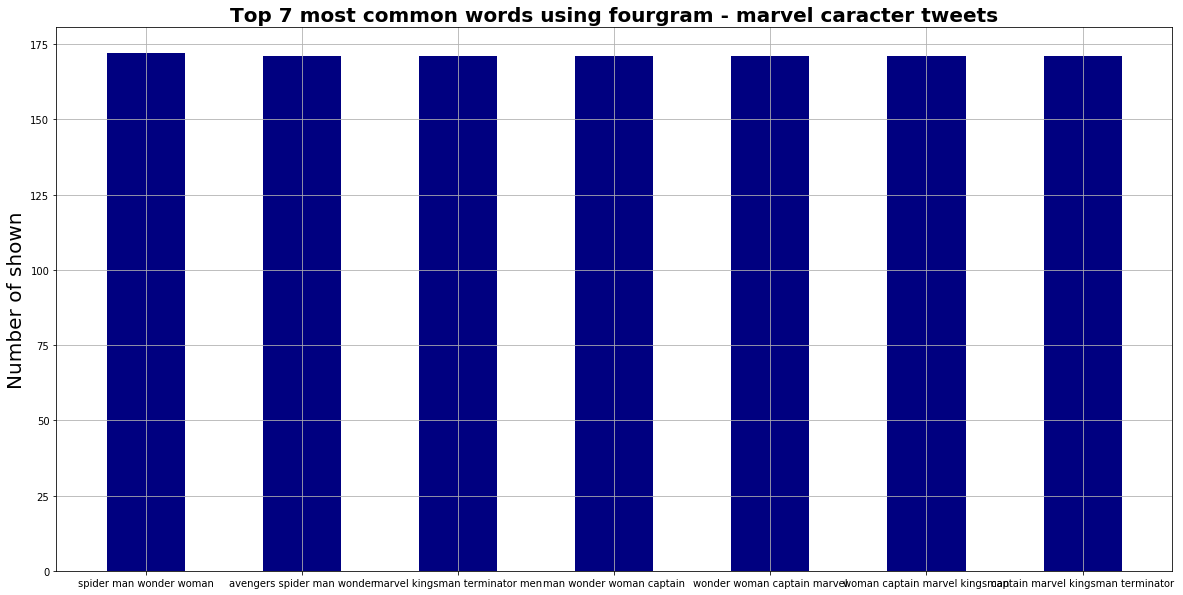

In [42]:
x_values =[]
y_values=[]
# plt.plot(onegram[0], onegram[1])
# plt.show()
for key_value in fourgram_result[:7] :
    x_values.append(key_value[0])
    y_values.append(key_value[1])
# x_values = list(range(len(prg_langs)))
width = 0.5
# fig, ax = plt.subplots()
fig, ax = plt.subplots( figsize=(20, 10))
plt.bar(x_values, y_values, width, alpha=1, color='Navy')

# Setting axis labels and ticks
ax.set_ylabel('Number of shown', fontsize=20)
ax.set_title('Top 7 most common words using fourgram - marvel caracter tweets', fontsize=20, fontweight='bold')
# ax.set_xticks([p + 0.2 * width for p in x_values])
ax.set_xticklabels(x_values)
plt.grid()


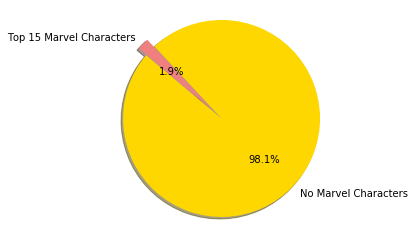

In [43]:
#This is from Stan lee topic tweets - 258 out of 13028 tweets mentioned top 15 marvel characters

labels = 'No Marvel Characters', 'Top 15 Marvel Characters'
sizes = [13028 , 258 ]
colors = ['gold', 'lightcoral'] #['lightcoral', 'lightskyblue'] #'gold', 'yellowgreen', 
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# 258 out of 13028 tweets have the marvel characters and 293 character occurrences in the 258 tweets. 


In [44]:
# this is from marvel characters tweets - total tweets 1399
tweets['stan'] = Characters_relevant_tweet['text'].apply(lambda tweet: word_in_text('stan', tweet))
tweets['stan'].value_counts()[True]

97

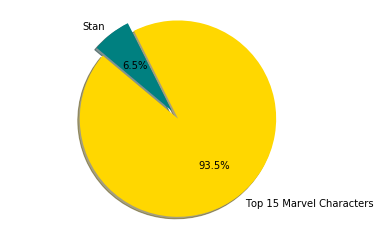

In [45]:
# marbel character topic tweets 97 out of 1399 tweets mentioned stan
labels = 'Top 15 Marvel Characters', 'Stan'
sizes = [1399 , 97 ]
colors = ['gold', 'teal'] #['lightcoral', 'lightskyblue'] #'gold', 'yellowgreen', 
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
